<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/NY_Housing_Data_Analysis_an_Visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Load the dataset
dataset = pd.read_csv("/content/NY-House-Dataset.csv")


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [16]:
dataset.count()

BROKERTITLE                    4801
TYPE                           4801
PRICE                          4801
BEDS                           4801
BATH                           4801
PROPERTYSQFT                   4801
ADDRESS                        4801
STATE                          4801
MAIN_ADDRESS                   4801
ADMINISTRATIVE_AREA_LEVEL_2    4801
LOCALITY                       4801
SUBLOCALITY                    4801
STREET_NAME                    4801
LONG_NAME                      4801
FORMATTED_ADDRESS              4801
LATITUDE                       4801
LONGITUDE                      4801
dtype: int64

In [17]:
dataset.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [3]:
# Display the first few rows of the dataset
print(dataset.head())

                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

<ipython-input-4-e43cc650fbec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


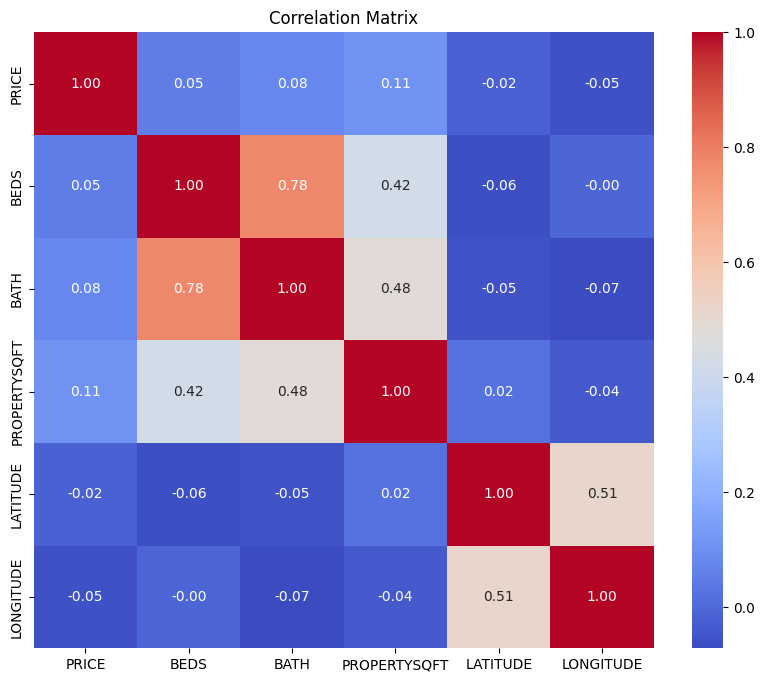

In [4]:
# Visualize the correlation matrix using a heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

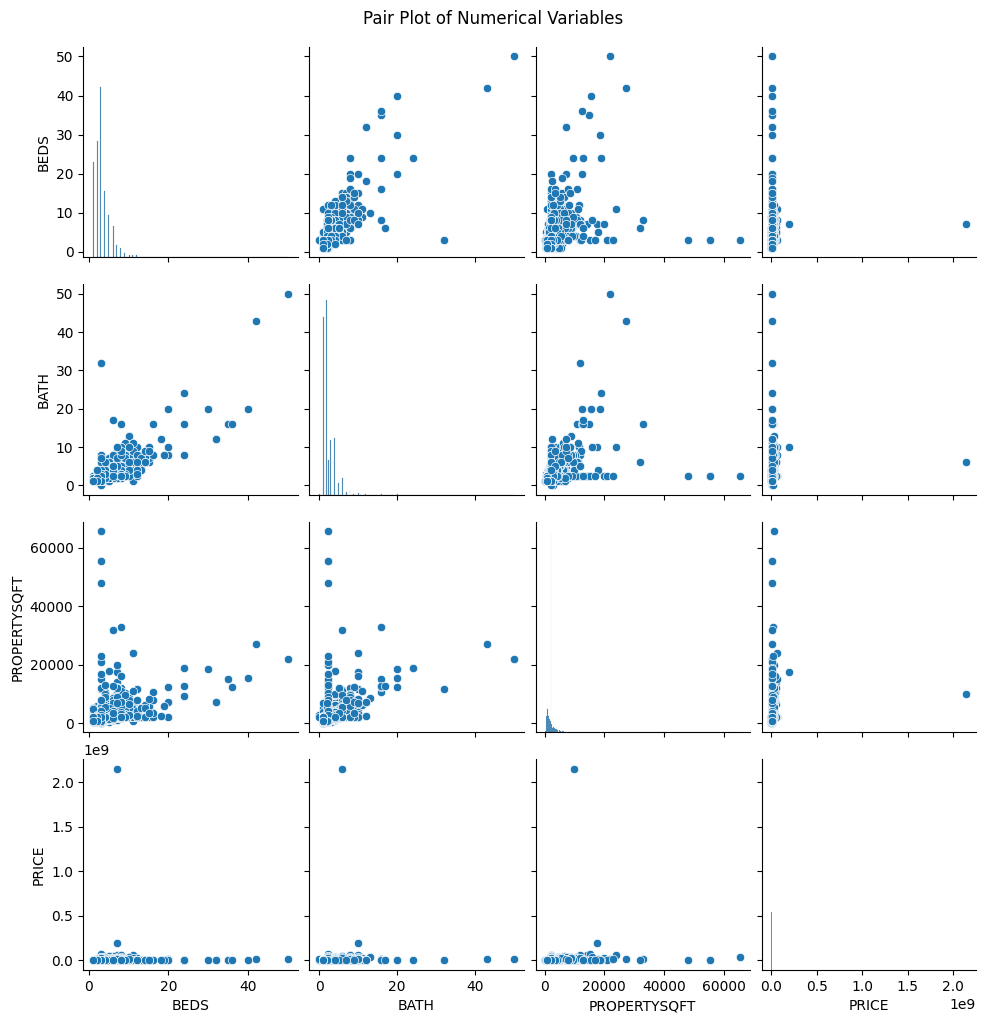

In [5]:
# Pairplot for exploring relationships between numerical variables
sns.pairplot(dataset[['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

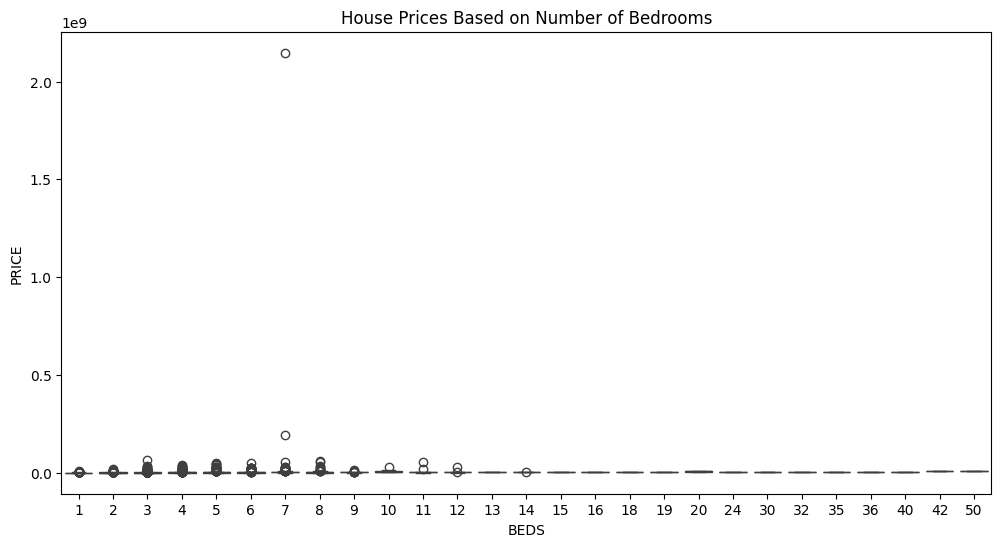

In [6]:
# Boxplot for the distribution of house prices based on the number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='BEDS', y='PRICE', data=dataset)
plt.title('House Prices Based on Number of Bedrooms')
plt.show()

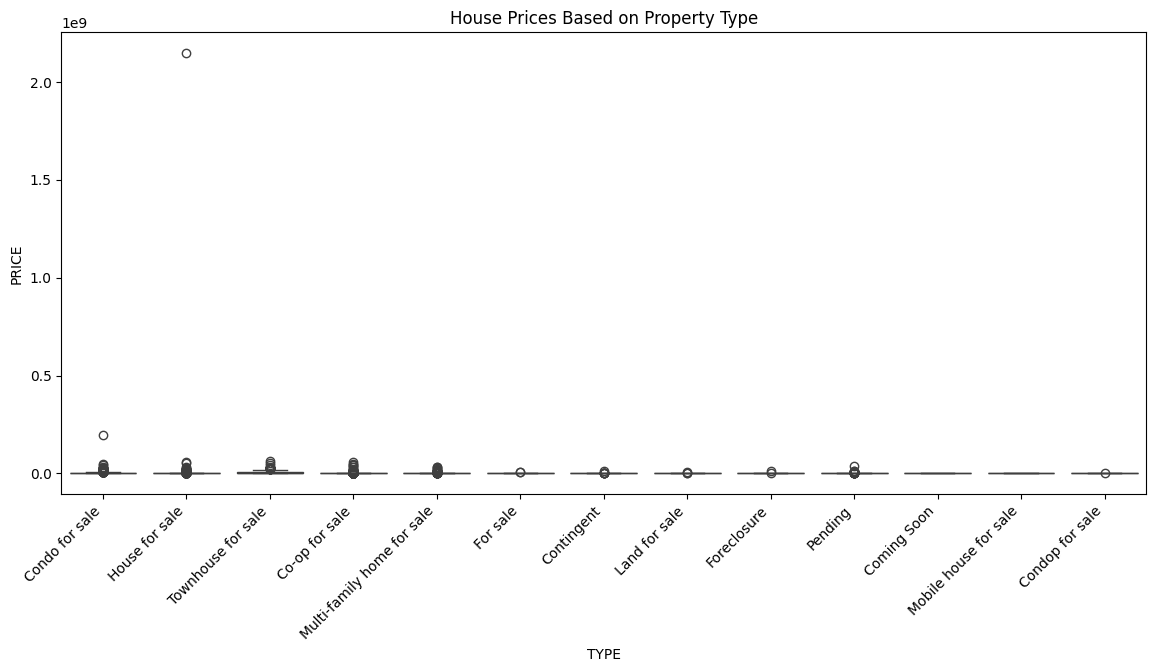

In [7]:
# Boxplot for the distribution of house prices based on the type of property
plt.figure(figsize=(14, 6))
sns.boxplot(x='TYPE', y='PRICE', data=dataset)
plt.xticks(rotation=45, ha='right')
plt.title('House Prices Based on Property Type')
plt.show()

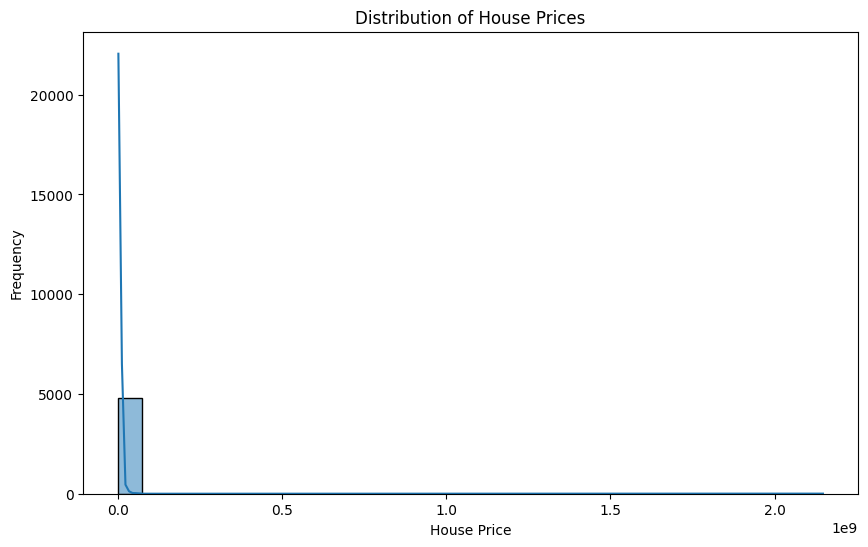

In [8]:
# Visualize the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(dataset['PRICE'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()


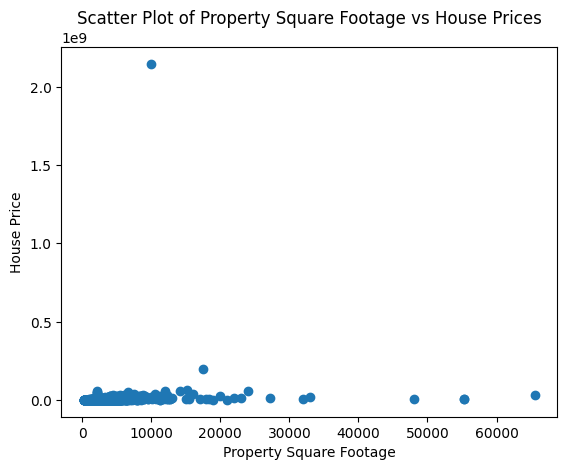

In [9]:
# Scatter plot of property square footage against house prices
plt.scatter(dataset['PROPERTYSQFT'], dataset['PRICE'])
plt.title('Scatter Plot of Property Square Footage vs House Prices')
plt.xlabel('Property Square Footage')
plt.ylabel('House Price')
plt.show()

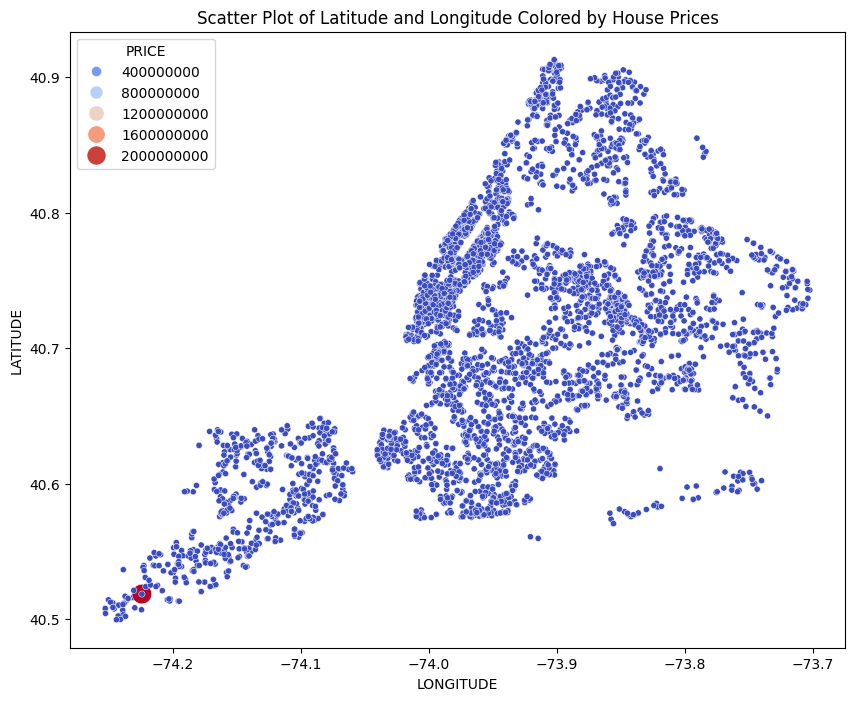

In [10]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='PRICE', data=dataset, palette='coolwarm', size='PRICE', sizes=(20, 200))
plt.title('Scatter Plot of Latitude and Longitude Colored by House Prices')
plt.show()

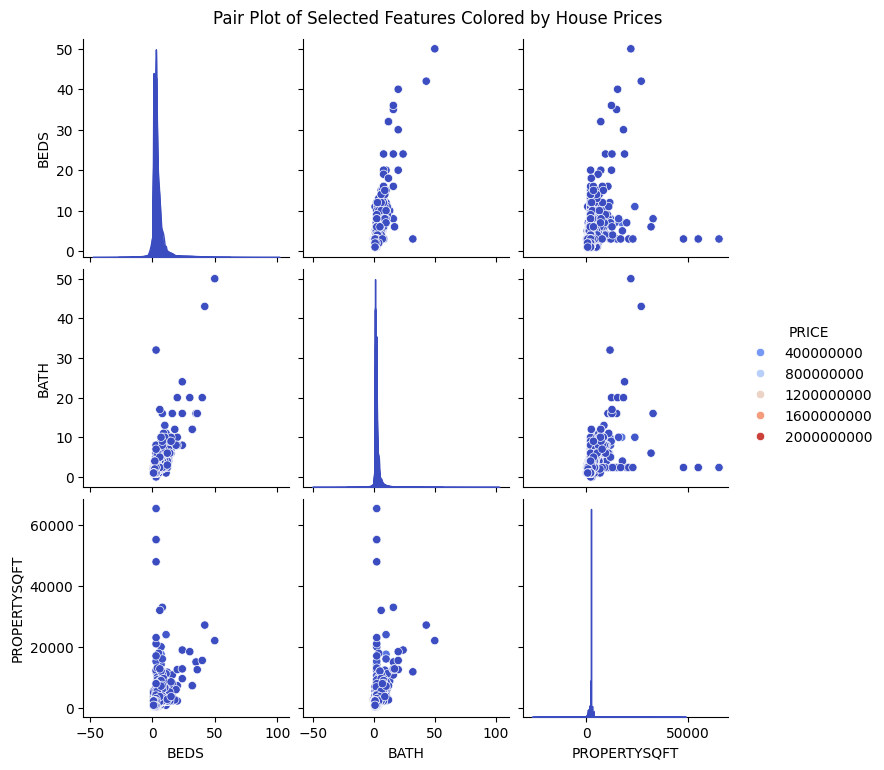

In [11]:
# Pairplot of selected features colored by house prices
selected_features = dataset[['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE']]
sns.pairplot(selected_features, hue='PRICE', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features Colored by House Prices', y=1.02)
plt.show()